In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository: https://github.com/jaslynmiura/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

The oil spills data set contains records of petroleum and other hazardous material spills in the state of New York. The data set includes information about each recorded spill in  New York; information such as date of the spill, location, source, type of material spilled, units measured, etc. This data set is provided by New York State Department of Environmental Conservation and is accessed through the [data.ny.gov website](https://data.ny.gov/) on November 10, 2025.

The TIGER Shapefile data set contains various information such as state and county codes, county names, and geometry data. This data set is accessed through the [United States Census Breau website](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) on November 10, 2025

## 3. Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [45]:
# Reading in the oil spills data.
fp = os.path.join('data/Spill_Incidents_20251105.csv')
spills = gpd.read_file(fp)

# Reading in the counties data.
fp = os.path.join('data/tl_2023_us_county/tl_2023_us_county.shp')
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [46]:
# Using head() to view the first 5 rows of the spills dataframe.
spills.head(5)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,...,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [47]:
# Printing the data types of the values in each column.
print('Data types of the values in each columm:\n', spills.dtypes)

Data types of the values in each columm:
 Spill Number               object
Program Facility Name      object
Street 1                   object
Street 2                   object
Locality                   object
County                     object
ZIP Code                   object
SWIS Code                  object
DEC Region                 object
Spill Date                 object
Received Date              object
Contributing Factor        object
Waterbody                  object
Source                     object
Close Date                 object
Material Name              object
Material Family            object
Quantity                   object
Units                      object
Recovered                  object
geometry                 geometry
dtype: object


In [ ]:
# Check the unique values in the `material_family` column
print('Unique values in the `Material family` column:', spills['Material Family'].unique())

Unique values in the `material_family` column: ['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']


In [51]:
# Check the unique values in the `county` column
print('Unique values in the `county` column`:\n', spills['County'].unique())

Unique values in the `county` column`:
 ['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'Schuyler' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex'
 'Chenango' 'Erie' 'Livingston' 'Oneida' 'Wayne' 'Suffolk' 'Orleans'
 'Ontario' 'Genesee' 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca'
 'Broome' 'Hamilton' 'Washington' 'Steuben' 'Rensselaer' 'Franklin'
 'Columbia' 'Fulton' 'Herkimer' 'Schoharie' 'Montgomery' 'Putnam'
 'Delaware' 'New Jersey - Region 2' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania - Region 3'
 

In [53]:
# Checking the number of rows and the number of columns in the spills dataframe.
print('Shape of catch_data:', spills.shape)

Shape of catch_data: (563617, 21)


In [66]:
print('Count of NA values:\n', spills.isna().sum())

Count of NA values:
 spill_number                  0
program_facility_name         0
street_1                      0
street_2                      0
locality                      0
county                        0
zip_code                      0
swis_code                     0
dec_region                    0
spill_date                  151
received_date                 0
contributing_factor           0
waterbody                     0
source                        0
close_date                11599
material_name                 0
material_family               0
quantity                      0
units                         0
recovered                     0
geometry                 563617
dtype: int64


e. From the preliminary data exploration, I noticed that the column names should be cleaned, to make data wrangling easier. I also noticed that the data types of the date columns were objects, not datatimes. Within this dataset, spilled material recorded are Other, Petroleum, Hazardous Material, Oxygenates. Within the county column, there are some counties included that may not be in New York state, such as the Canada, Connecticut, and Massachusetts regions, to name a few. Finally the data set contains 563,617 rows and 21 columns. It should also be noted that the geometry column is filled entirely with NA values.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [54]:
# Converting the column names to snake lower notation.
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
spills


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,...,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563612,0400932,`-NYCT,WATER/COENTIS SLIP,,MANHATTAN,New York,,3101,2,04/27/2004,...,Equipment Failure,,"Institutional, Educational, Gov., Other",04/29/2004,unknown hazardous material,Hazardous Material,0,Pounds,0,None
563613,9904003,`-NYCT,5TH AND WEST 50 ST,,MANHATTAN,New York,,3101,2,07/06/1999,...,Housekeeping,,Commercial Vehicle,03/03/2009,diesel,Petroleum,20,Gallons,0,None
563614,9213322,`-NYCT / 146 ST,721 LENOX AVE,,MANHATTAN,New York,,3101,2,03/02/1993,...,Tank Overfill,,Commercial/Industrial,02/10/2003,#2 fuel oil,Petroleum,200,Gallons,0,None
563615,8909580,`-NYCT BUS DEPOT - S I,CASTLETON AVE @ RECTOR ST,,STATEN ISLAND,Richmond,,4301,2,01/05/1990,...,Abandoned Drums,,Commercial/Industrial,01/05/1990,unknown petroleum,Petroleum,0,,0,None


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [55]:
# Update the date columns to a datetime data type.
spills['spill_date'] = spills['spill_date'].astype('datetime64[ns]')
spills['close_date'] = spills['close_date'].astype('datetime64[ns]')
spills.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,...,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,2001-10-10,...,Unknown,,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,2004-08-21,...,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,2004-08-21,...,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,2002-08-02,...,Equipment Failure,,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,2003-01-20,...,Traffic Accident,,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6,Gallons,6,None


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [ ]:
# Selecting recored petroleum spills that occurred between 01-01-2023 and 10-31-2023 and saving it to petr_23 dataframe.
petr_23 = spills[(spills['spill_date'].between('01-01-2023', '10-31-2023')) & (spills['material_family'] == 'Petroleum')]
petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,...,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,geometry
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,diesel,Petroleum,0,,0,None
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,#2 fuel oil,Petroleum,0,Gallons,0,None
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,gasoline,Petroleum,0,,0,None
224,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0,,0,None
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,...,Tank Test Failure,,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0,,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563103,2306261,ZHANG RESIDENCE,10 LINCOLN AVE,,ROSLYN,Nassau,,3022,1,2023-10-23,...,Equipment Failure,,Private Dwelling,2023-12-01,#2 fuel oil,Petroleum,0,,0,None
563108,2303072,ZHANG RESIDENCE,93 CHERRY LANE,,HICKSVILLE,Nassau,,3024,1,2023-07-14,...,Equipment Failure,,Private Dwelling,2023-09-18,#2 fuel oil,Petroleum,0,,0,None
563217,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,,LARCHMONT,Westchester,,6032,3,2023-01-10,...,Equipment Failure,,Private Dwelling,NaT,#2 fuel oil,Petroleum,0,,0,None
563509,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,,PELHAM,Westchester,,6044,3,2023-05-16,...,Equipment Failure,,Private Dwelling,2023-07-11,#2 fuel oil,Petroleum,0,,0,None


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [ ]:
# Checking that the only year in the spill_date column is 2023, using `unique()`.
petr_23_year = petr_23.spill_date.dt.year.unique()
print(f"The dataframe petr_23 contains data from the year: {petr_23_year}")

The dataframe petr_23 contains data from the year: [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [58]:
# Creating an assert test to assure that new dataframe contains only pertroleumn spills.
assert (petr_23['material_family'] == 'Petroleum').all()

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [59]:
# Creating a new dataframe where the number of pertroleum spills is counted by the county, and reseting the index of the dataframe to 'n_spills'.
spills_per_county = (petr_23.groupby('county')
                            .size()
                            .reset_index(name = 'n_spills')).copy()
spills_per_county 

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [ ]:
grader.check("q5d")

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

From my preliminary data exploration I found that there are 3235 rows and 19 columns in the counties dataframe. From looking at the data types of each column, I saw that this dataframe has a geometry column. The geomerty of this column could be used for for the spills data, if we merge the dataset on a common column. After plotting the geodateframe, I saw that the dataset contains geometries for every state and territory in the United States. Since, our area of study is confined to New York state, we'll have to filter through this data set. The column names could also be changed for easier data wrangling.

In [61]:
# Using head() to view the first 5 rows of the counties dataframe.
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [60]:
# Printing the data types of the values in each column.
print('Data types of the values in each columm:\n', counties.dtypes)

Data types of the values in each columm:
 STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [ ]:
# Checking teh crs of the counties dataset.
print('The CRS of the counties dataset:', counties.crs)

The CRS of the counties dataset: EPSG:4269


<Axes: >

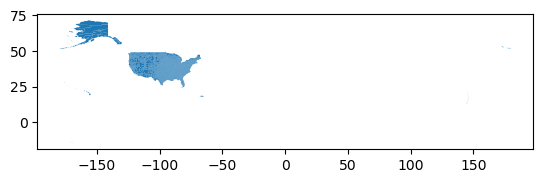

In [64]:
# Plotting the geodataframe.
counties.plot()

In [65]:
print('Shape of catch_data:', counties.shape)

Shape of catch_data: (3235, 19)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [68]:
# Converting the column names to snake lower for simpler data wrangling.
counties.columns = counties.columns.str.lower().str.replace(' ', '_')
counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

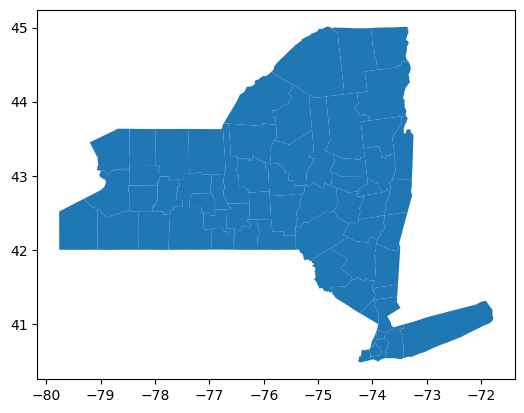

In [ ]:
# Filtering the dataset to only contain data of New York State, using the state code.
ny_counties = counties[counties['statefp'] == '36']

# Plotting the ny_counties geodataframe.
ny_counties.plot()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [72]:
# Printing the unique values in the 'name' column.
print('Unique values in the `name` column of the ny_counties dataframe:\n', ny_counties['name'].unique())

Unique values in the `name` column of the ny_counties dataframe:
 ['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [73]:
# Printing the unique values in the 'county' column.
print('Unique values in the `county` column of the spills_per_county dataframe:\n' ,spills_per_county['county'].unique())

Unique values in the `county` column of the spills_per_county dataframe:
 ['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [ ]:
# Listing the names that are in spills_per_county that is NOT found in ny_counties.
diff_names_spills = np.setdiff1d(spills_per_county.county, ny_counties.name).tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [ ]:
grader.check("7Ac")

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [76]:
# Listing the names that are in ny_counties but NOT in spills_per_county.
diff_names_ny = np.setdiff1d(ny_counties.name, spills_per_county.county).tolist()
diff_names_ny

['St. Lawrence']

In [ ]:
grader.check("7Ad")

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [77]:
# Filtering to the row where 'county' is Tuscarora Indian Reservation.
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [78]:
# Using .loc[] indexing to update the value in the indexed cell to 'St. Lawrence'.
spills_per_county.loc[50, 'county'] = 'St. Lawrence'


In [79]:
# Checking that the update was made, by using .loc[] to index to the same row again.
spills_per_county.loc[50, 'county']

'St. Lawrence'

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [80]:
# Renaming the 'name' column in the ny_counties dataframe to 'county'.
ny_counties = ny_counties.rename(columns= {'name':'county'})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [81]:
# Merging the ny_counties and spills_per_county dataframe using inner join and joining on the 'county' column.
ny_counties = pd.merge(ny_counties,
                           spills_per_county,
                           how = 'inner', # keep rows with matches in both dataframes
                           on = 'county')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [82]:
# Adding a value to the indexed cell, which is the n_spills of Niagara.
ny_counties.loc[45, 'n_spills'] += 1

In [83]:
# Print the new number of spills in Niagara county.
ny_counties[ny_counties['county'] == 'Niagara']

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
45,36,063,00974130,36063,0500000US36063,Niagara,Niagara County,06,H1,G4020,160,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",89


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



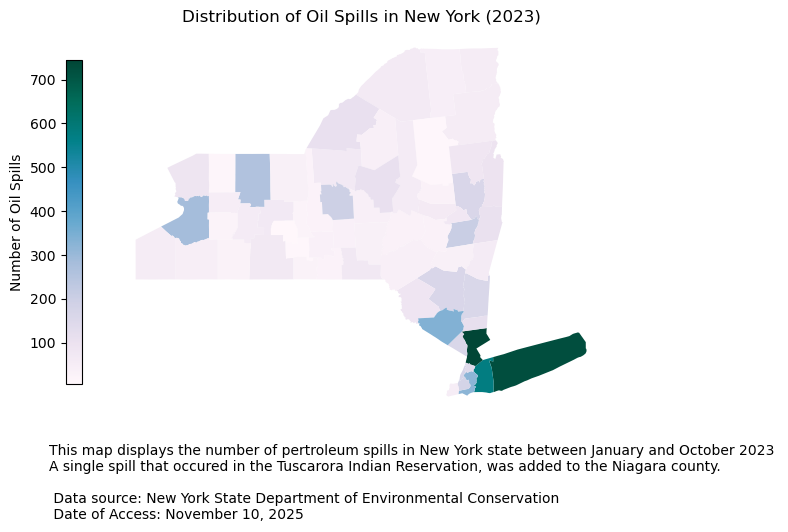

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

ny_counties.plot(column = 'n_spills',
                    ax = ax,
                    legend = True,
                    cmap = 'PuBuGn',
                    legend_kwds={
                        "shrink": 0.7,
                        "label": "Number of Oil Spills",
                        "orientation": "vertical",
                        "location": "left",
                        "pad": 0.05
    }
)

ax.set_title('Distribution of Oil Spills in New York (2023)')
plt.figtext(0.2, 0, "This map displays the number of pertroleum spills in New York state between January and October 2023 \nA single spill that occured in the Tuscarora Indian Reservation, was added to the Niagara county. \n \n Data source: New York State Department of Environmental Conservation \n Date of Access: November 10, 2025")

plt.show()


b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

Using the merged data frames of the oil spills and TIGER shapefile of the counties data, this map displaying the distribution of pertroleum spills in the New York state was made. The map was made by plotting the geometry of New York and then coloring each county by the n_spills column in the joined dataframe. The continuous color scale emphasizes the variation in number of petroleumn spills in the state. The data source and date of access provides some credibility for the map.

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [ ]:
grader.check_all()